In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *

import declarative

Populating the interactive namespace from numpy and matplotlib


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 
from phasor import mechanical
from phasor import transducers 
from phasor import electronics

b'2017-09-22 09:45:51 -0400 (a76310c5d4476904171a3f1b18117db454719432)'


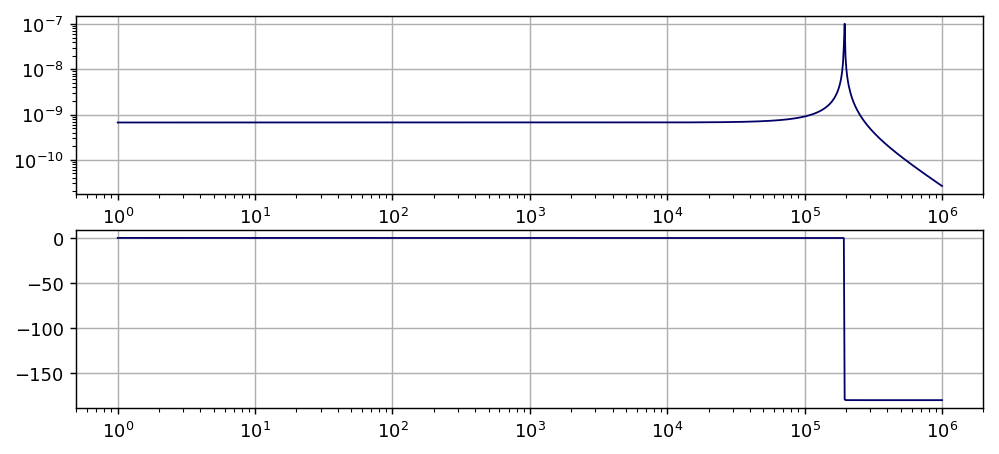

In [11]:
sys = system.system.BGSystem(
    F_AC = logspaced(1, 1e6, 1000),
)
sys.own.F1 = mechanical.ForceSource()
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.F1.pm_A,
)
sys.own.M1 = mechanical.Mass(mass_kg = .001)
sys.own.S1 = mechanical.TerminatorSpring(elasticity_N_m = 1500e6)
sys.own.D1 = mechanical.TerminatorDamper(resistance_Ns_m = .1)
sys.M1.pm_A.bond(sys.F1.pm_A)
sys.S1.pm_A.bond(sys.F1.pm_A)
sys.D1.pm_A.bond(sys.F1.pm_A)
sys.own.RAC1 = readouts.ACReadout(
    portD = sys.F1.F.i,
    portN = sys.R1.d.o,
)

readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

#readoutI.AC_sensitivity

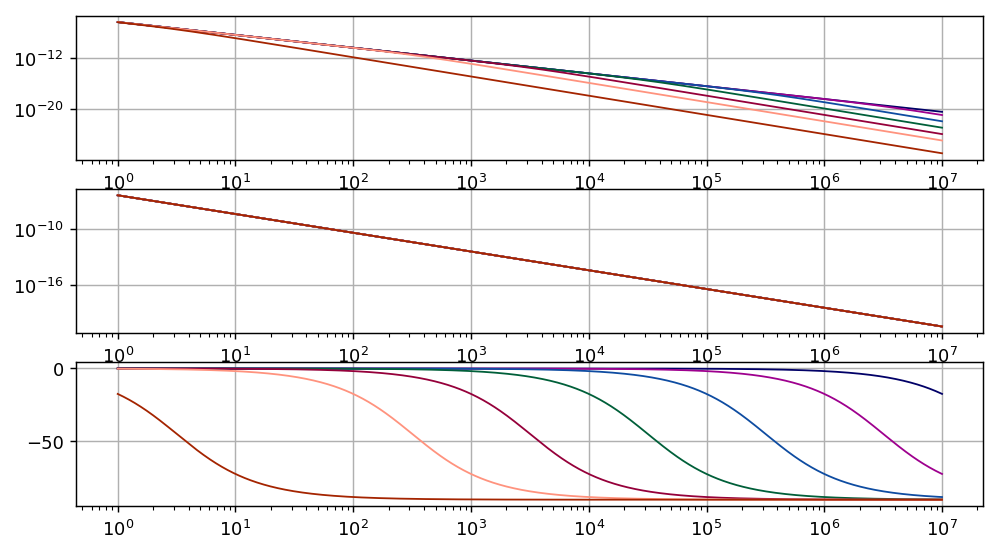

In [13]:
Fb = mplfigB(Nrows=3)

for R in [.01, .1, 1, 10, 100, 1000, 1e5]:
    sys = system.system.BGSystem(
        F_AC = logspaced(1, 1e7, 1000),
    )

    sys.own.V1 = electronics.VoltageSource()
    sys.own.R_out = electronics.SeriesResistor(
        resistance_Ohms = R,
    )
    sys.own.PZT = transducers.PZTMountedGrounded(
        capacitance_F = 500e-9,
        full_swing_um = 3.3,
        max_voltage_V = 200,
        k_N_m         = 1500e6,
    )
    sys.V1.pe_A.bond_sequence(
        sys.R_out.pe_A,
        sys.PZT.pe_A,
    )
    sys.own.M1 = mechanical.Mass(mass_kg = .001)
    sys.own.S1 = mechanical.SeriesSpring(elasticity_N_m = 1000e6)
    sys.M1.pm_A.bond_sequence(
        #sys.S1.pm_A,
        sys.PZT.pm_Z,
    )
    sys.own.R1 = mechanical.DisplacementReadout(
        terminal = sys.M1.pm_A,
    )
    sys.own.RAC1 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.R1.d.o,
    )

    readoutI =  sys.RAC1


    F_RC_Hz = 1 / (2 * np.pi * sys.R_out.resistance_Ohms * sys.PZT.capacitance_F)
    F = sys.environment.F_AC.F_Hz.val
    cap_comp = 1/(1 + 1j * F / F_RC_Hz)

    Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
    Fb.ax1.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity / cap_comp))
    Fb.ax2.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
#Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity / cap_comp, deg = True))

#readoutI.AC_sensitivity

(0.001, 5.011898205624755)

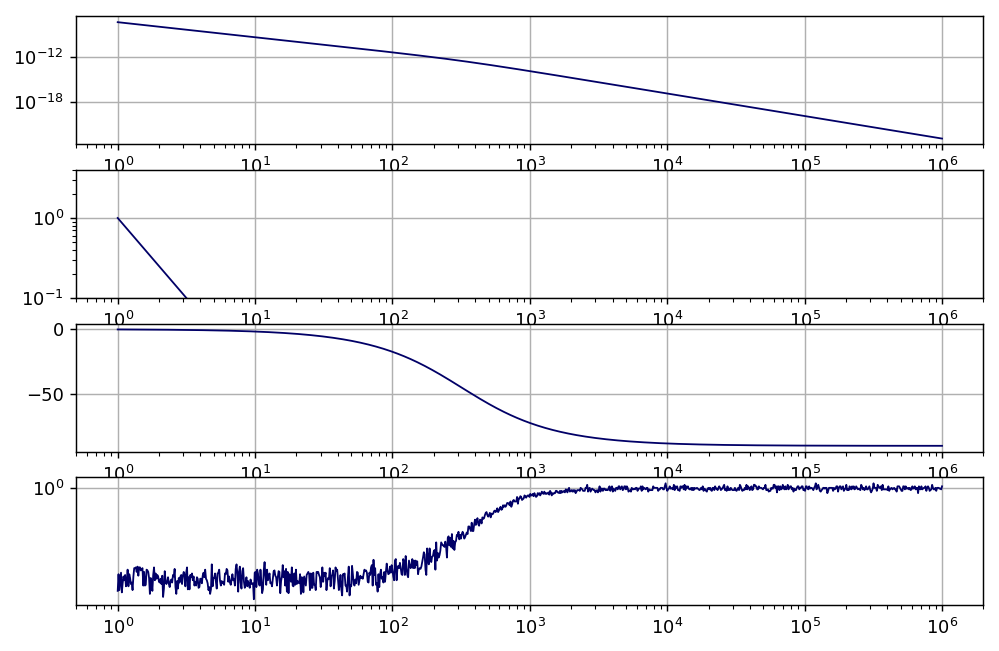

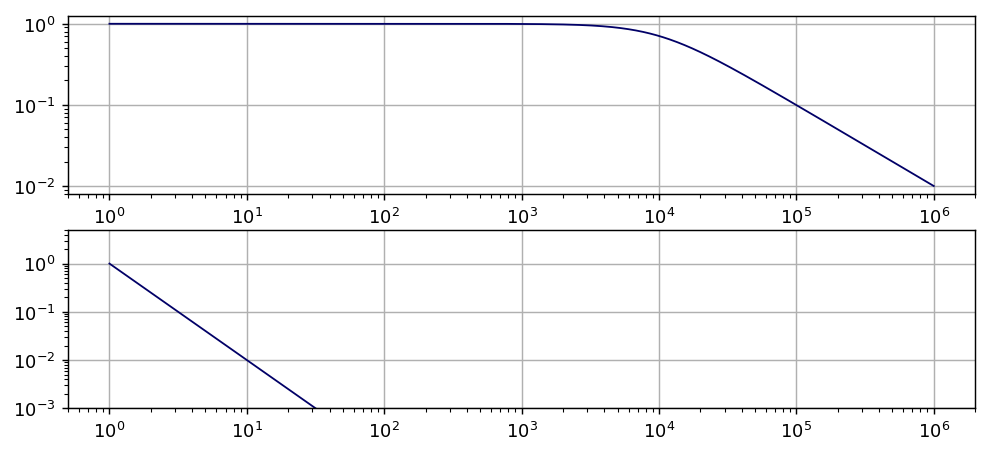

In [6]:
Fb = mplfigB(Nrows=4)

for R in [1000]:
    sys = system.system.BGSystem(
        F_AC = logspaced(1e0, 1e6, 1000),
    )

    sys.own.V1 = electronics.VoltageSource()
    sys.own.R_out = electronics.SeriesResistor(
        resistance_Ohms = R,
    )
    sys.own.PZT = transducers.PZTMountedGrounded(
        capacitance_F = 500e-9,
        full_swing_um = 3.3,
        max_voltage_V = 200,
        k_N_m         = 1500e6,
    )
    sys.own.S1 = mechanical.SeriesSpring(elasticity_N_m = 100e6)
    sys.V1.pe_A.bond_sequence(
        sys.R_out.pe_A,
        sys.PZT.pe_A,
    )
    sys.own.M1 = mechanical.Mass(mass_kg = .01)
    sys.M1.pm_A.bond_sequence(
        sys.S1.pm_A,
        sys.PZT.pm_Z,
    )
    sys.own.R1 = mechanical.DisplacementReadout(
        terminal = sys.M1.pm_A,
    )
    sys.own.RIpzt = electronics.CurrentReadout(
        terminal = sys.PZT.pe_A,
        direction = 'out',
    )
    sys.own.RVpzt = electronics.VoltageReadout(
        terminal = sys.PZT.pe_A,
    )
    sys.own.RAC1 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.R1.d.o,
    )
    
    sys.own.RAC2 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.RVpzt.V.o,
    )
    sys.own.RAC3 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.RIpzt.I.o,
    )

    readoutI =  sys.RAC1


    F_RC_Hz = 1 / (2 * np.pi * sys.R_out.resistance_Ohms * sys.PZT.capacitance_F)
    F = sys.environment.F_AC.F_Hz.val
    cap_comp = 1/(1 + 1j * F / F_RC_Hz)

    Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
    Fb.ax1.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity / cap_comp / readoutI.AC_sensitivity[0]))
    Fb.ax1.set_ylim(1e-1, None)
    Fb.ax2.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
    
    Fb.ax3.loglog(readoutI.F_Hz.val, abs(sys.RAC2.AC_sensitivity / cap_comp))
    #Fb.ax3.loglog(readoutI.F_Hz.val, abs(R * sys.RAC3.AC_sensitivity / cap_comp))
    #Fb.ax3.loglog(readoutI.F_Hz.val, abs(sys.RAC2.AC_sensitivity + R * sys.RAC3.AC_sensitivity))
#Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity / cap_comp, deg = True))

#readoutI.AC_sensitivity

Fb = mplfigB(Nrows=2)
X = 10 * sys.RAC2.AC_sensitivity / cap_comp * 1j * F / 1e5
dloop = 1 / (1 - X)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(dloop))
Fb.ax1.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity / cap_comp / readoutI.AC_sensitivity[0] * dloop))
Fb.ax1.set_ylim(1e-3, None)

(0.001, 3.9740185570996367)

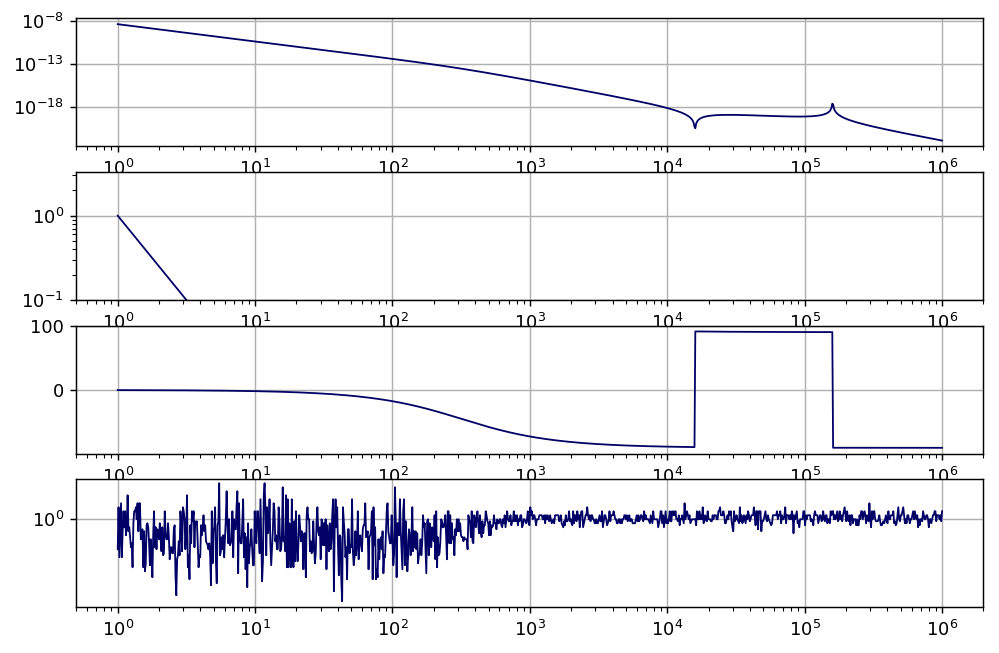

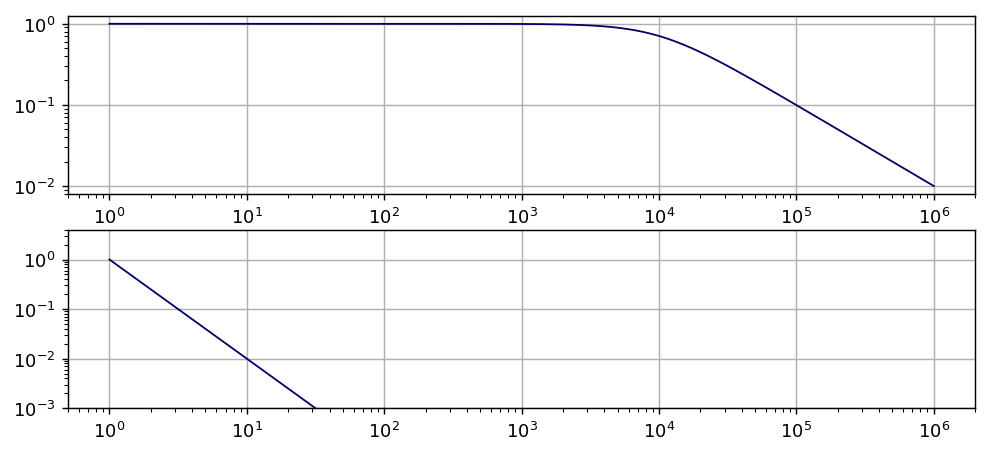

In [7]:
#with additional modal resonance
Fb = mplfigB(Nrows=4)

for R in [1000]:
    sys = system.system.BGSystem(
        F_AC = logspaced(1e0, 1e6, 1000),
    )

    sys.own.V1 = electronics.VoltageSource()
    sys.own.R_out = electronics.SeriesResistor(
        resistance_Ohms = R,
    )
    sys.own.PZT = transducers.PZTMountedGrounded(
        capacitance_F = 500e-9,
        full_swing_um = 3.3,
        max_voltage_V = 200,
        k_N_m         = 1500e6,
    )
    sys.V1.pe_A.bond_sequence(
        sys.R_out.pe_A,
        sys.PZT.pe_A,
    )
    sys.own.M1 = mechanical.Mass(mass_kg = .001)
    sys.own.S1 = mechanical.SeriesSpring(elasticity_N_m = 1000e6)
    sys.own.M2 = mechanical.Mass(mass_kg = .1)
    sys.M1.pm_A.bond_sequence(
        #sys.S1.pm_A,
        sys.PZT.pm_Z,
    )
    sys.M1.pm_A.bond_sequence(
        sys.S1.pm_A,
        sys.M2.pm_A,
    )
    sys.own.R1 = mechanical.DisplacementReadout(
        terminal = sys.M1.pm_A,
    )
    sys.own.RIpzt = electronics.CurrentReadout(
        terminal = sys.PZT.pe_A,
        direction = 'out',
    )
    sys.own.RVpzt = electronics.VoltageReadout(
        terminal = sys.PZT.pe_A,
    )
    sys.own.RAC1 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.R1.d.o,
    )
    
    sys.own.RAC2 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.RVpzt.V.o,
    )
    sys.own.RAC3 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.RIpzt.I.o,
    )

    readoutI =  sys.RAC1


    F_RC_Hz = 1 / (2 * np.pi * sys.R_out.resistance_Ohms * sys.PZT.capacitance_F)
    F = sys.environment.F_AC.F_Hz.val
    cap_comp = 1/(1 + 1j * F / F_RC_Hz)

    Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
    Fb.ax1.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity / cap_comp / readoutI.AC_sensitivity[0]))
    Fb.ax1.set_ylim(1e-1, None)
    Fb.ax2.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
    
    Fb.ax3.loglog(readoutI.F_Hz.val, abs(sys.RAC2.AC_sensitivity / cap_comp))
    #Fb.ax3.loglog(readoutI.F_Hz.val, abs(R * sys.RAC3.AC_sensitivity / cap_comp))
    #Fb.ax3.loglog(readoutI.F_Hz.val, abs(sys.RAC2.AC_sensitivity + R * sys.RAC3.AC_sensitivity))
#Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity / cap_comp, deg = True))

#readoutI.AC_sensitivity

Fb = mplfigB(Nrows=2)
X = 10 * sys.RAC2.AC_sensitivity / cap_comp * 1j * F / 1e5
dloop = 1 / (1 - X)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(dloop))
Fb.ax1.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity / cap_comp / readoutI.AC_sensitivity[0] * dloop))
Fb.ax1.set_ylim(1e-3, None)

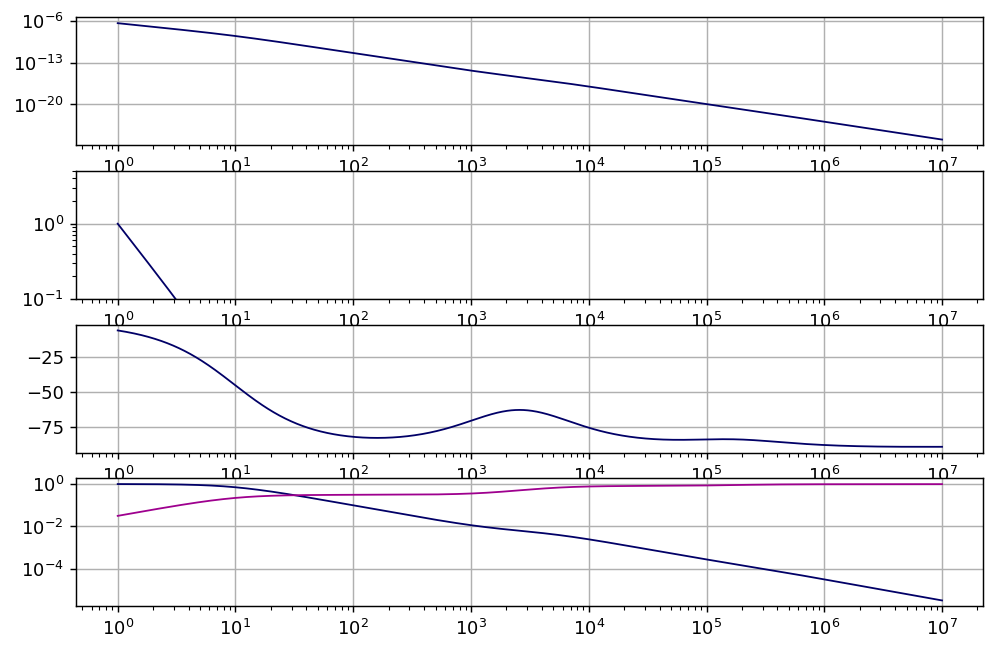

In [8]:
Fb = mplfigB(Nrows=4)

for R in [10000]:
    sys = system.system.BGSystem(
        F_AC = logspaced(1, 1e7, 1000),
    )

    sys.own.V1 = electronics.VoltageSource()
    sys.own.R_out = electronics.SeriesResistor(
        resistance_Ohms = R,
    )
    sys.own.R_disp = electronics.TerminatorResistor(
        resistance_Ohms = 1,
    )
    sys.own.C_disp = electronics.SeriesCapacitor(
        capacitance_Farads = 1e-8,
    )
    sys.own.R_disp2 = electronics.TerminatorResistor(
        resistance_Ohms = 10,
    )
    sys.own.C_disp2 = electronics.SeriesCapacitor(
        capacitance_Farads = 1e-7,
    )
    sys.own.R_disp3 = electronics.TerminatorResistor(
        resistance_Ohms = 100,
    )
    sys.own.C_disp3 = electronics.SeriesCapacitor(
        capacitance_Farads = 1e-6,
    )
    sys.own.S1 = mechanical.SeriesSpring(elasticity_N_m = 1000e6)
    sys.own.PZT = transducers.PZTMountedGrounded(
        capacitance_F = 500e-9,
        full_swing_um = 3.3,
        max_voltage_V = 200,
        k_N_m         = 1500e6,
    )
    sys.V1.pe_A.bond_sequence(
        sys.R_out.pe_A,
        sys.PZT.pe_A,
    )
    sys.PZT.pe_A.bond_sequence(
        sys.C_disp.pe_A,
        sys.R_disp.pe_A,
    )
    sys.PZT.pe_A.bond_sequence(
        sys.C_disp2.pe_A,
        sys.R_disp2.pe_A,
    )
    sys.PZT.pe_A.bond_sequence(
        sys.C_disp3.pe_A,
        sys.R_disp3.pe_A,
    )
    sys.own.M1 = mechanical.Mass(mass_kg = .001)
    sys.M1.pm_A.bond_sequence(
        sys.S1.pm_A,
        sys.PZT.pm_Z,
    )
    sys.own.R1 = mechanical.DisplacementReadout(
        terminal = sys.M1.pm_A,
    )
    sys.own.RIpzt = electronics.CurrentReadout(
        terminal = sys.PZT.pe_A,
        direction = 'out',
    )
    sys.own.RVpzt = electronics.VoltageReadout(
        terminal = sys.PZT.pe_A,
    )
    sys.own.RAC1 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.R1.d.o,
    )
    
    sys.own.RAC2 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.RVpzt.V.o,
    )
    sys.own.RAC3 = readouts.ACReadout(
        portD = sys.V1.V.i,
        portN = sys.RIpzt.I.o,
    )

    readoutI =  sys.RAC1


    F_RC_Hz = 1 / (2 * np.pi * sys.R_out.resistance_Ohms * sys.PZT.capacitance_F)
    F = sys.environment.F_AC.F_Hz.val
    cap_comp = 1/(1 + 1j * F / F_RC_Hz)

    Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
    Fb.ax1.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity / cap_comp / readoutI.AC_sensitivity[0]))
    Fb.ax1.set_ylim(1e-1, None)
    Fb.ax2.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
    
    Fb.ax3.loglog(readoutI.F_Hz.val, abs(sys.RAC2.AC_sensitivity))
    Fb.ax3.loglog(readoutI.F_Hz.val, abs(R * sys.RAC3.AC_sensitivity))
    #Fb.ax3.loglog(readoutI.F_Hz.val, abs(sys.RAC2.AC_sensitivity + R * sys.RAC3.AC_sensitivity))
#Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity / cap_comp, deg = True))

#readoutI.AC_sensitivity

In [9]:
(.25 * .0254)**2 * np.pi * 3.1e-3 * 2.2 * 1e3

0.0008639362518612335